In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing

from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from nltk import bigrams
from nltk import trigrams  
import pandas as pd

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


import sklearn.metrics as metrics

In [2]:
df = pd.read_csv(r'C:\Madhan\Analytics\Machine_Learning_project_work\Great_Lakes_AIML\Capstone\madan\Verdict_From_JT_30-lines_2019-03-21_22-22-21.csv')

In [3]:
df.head()

,index,HTML_File_Name,Judgement_Order_Text,Verdict
0,0,Delhi-CC_361_2018-2018-04-17.html,The present complaint at the stage of admissio...,Dismissed
1,1,West_Bengal-CC_289_2016-2017-11-14.html,from the appropriate authority and unfortunate...,Won
2,2,West_Bengal-CC_322_2013-2016-12-02.html,The notice issued upon Opposite Party no.1/dev...,Won
3,3,Delhi-CC_352_2017-2017-04-17.html,[(2) A complainant shall be instituted in a St...,Dismissed
4,4,West_Bengal-CC_459_2015-2016-08-11.html,Ld. Advocate for the Complainants is present. ...,Withdrawn


In [4]:
df.Verdict.value_counts()

Won              361
Dismissed        182
Withdrawn         18
Partially Won      8
Partially won      4
Name: Verdict, dtype: int64

In [5]:
#w.loc[w.female != 'female', 'female'] = 0
#w.loc[w.female != 'female', 'female'] = 0

#w['female'] = w['female'].replace(regex='female', value=1)
df['Verdict'] = df['Verdict'].replace(regex='Partially won',value= 'Partially Won')

In [6]:
df.Verdict.value_counts()

Won              361
Dismissed        182
Withdrawn         18
Partially Won     12
Name: Verdict, dtype: int64

In [7]:
df['state'] = df.HTML_File_Name.str[0:5]

In [8]:
df.state.value_counts()

West_    247
Delhi    229
NCDRC     75
Chand     22
Name: state, dtype: int64

## Encoding State column

In [9]:
df['state_enc'] = df["state"].values
print("BEFORE ENCODING : {}".format(df.state_enc[0:10]))

print("")

le = preprocessing.LabelEncoder()
le.fit(df.state)

print("ENCODED CLASSES : {}".format(le.classes_))
print("")

df['state_enc'] = le.transform(df.state_enc)

print(df.state_enc.value_counts())
print(df.state.value_counts())

BEFORE ENCODING : 0    Delhi
1    West_
2    West_
3    Delhi
4    West_
5    Chand
6    Delhi
7    West_
8    Delhi
9    West_
Name: state_enc, dtype: object

ENCODED CLASSES : ['Chand' 'Delhi' 'NCDRC' 'West_']

3    247
1    229
2     75
0     22
Name: state_enc, dtype: int64
West_    247
Delhi    229
NCDRC     75
Chand     22
Name: state, dtype: int64


#### 0: Chandigarh, 1: Delhi, 2: NCRDC, 3: WestBengal

In [10]:
df['Labelenc'] = df["Verdict"].values
print("BEFORE ENCODING : {}".format(df.Labelenc[0:10]))

print("")

le = preprocessing.LabelEncoder()
le.fit(df.Verdict)

print("ENCODED CLASSES : {}".format(le.classes_))
print("")

df['Labelenc'] = le.transform(df.Labelenc)

print(df.Labelenc.value_counts())
print(df.Verdict.value_counts())

BEFORE ENCODING : 0    Dismissed
1          Won
2          Won
3    Dismissed
4    Withdrawn
5          Won
6    Dismissed
7          Won
8    Dismissed
9          Won
Name: Labelenc, dtype: object

ENCODED CLASSES : ['Dismissed' 'Partially Won' 'Withdrawn' 'Won']

3    361
0    182
2     18
1     12
Name: Labelenc, dtype: int64
Won              361
Dismissed        182
Withdrawn         18
Partially Won     12
Name: Verdict, dtype: int64


### 
    3 is Won 
    0 is Dismissed 
    2 is withdrawn 
    1 is Parrially Won

In [11]:
X = df.Judgement_Order_Text

In [12]:
y = df.Labelenc

In [13]:
X_train_txt, X_test_txt, y_train, y_test, state_train,state_test = train_test_split(X, y, df.state_enc,test_size=0.2, random_state=1)

In [14]:
state_train.shape

(458,)

In [15]:
X_train_txt.shape

(458,)

In [16]:
X_test_txt.shape

(115,)

In [17]:
y_train.shape

(458,)

In [18]:
y_test.shape

(115,)

In [19]:
import scipy as sp

In [20]:
state_train = np.array(state_train)

In [21]:
state_train

array([2, 2, 1, 3, 2, 1, 1, 1, 3, 1, 2, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 1, 3, 1, 2, 0, 1, 3, 3, 1, 1,
       1, 1, 2, 1, 1, 3, 0, 3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 1, 2, 2, 1, 1,
       3, 1, 1, 3, 1, 2, 1, 1, 3, 1, 3, 2, 3, 1, 1, 3, 1, 1, 1, 2, 1, 2,
       3, 0, 3, 3, 1, 1, 3, 3, 3, 0, 1, 1, 2, 2, 1, 3, 3, 1, 3, 1, 1, 3,
       1, 1, 3, 3, 0, 3, 3, 0, 3, 1, 3, 3, 2, 3, 3, 1, 1, 3, 1, 3, 3, 1,
       1, 3, 1, 3, 3, 1, 1, 2, 3, 0, 3, 2, 1, 2, 3, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 1, 3, 1, 1, 3, 1, 2, 3, 3, 3, 1, 0,
       1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 2, 3, 3, 2, 1, 3, 1, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1, 1,
       1, 1, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 3, 1, 3, 3, 2, 3, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1,

In [22]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3),lowercase=True,min_df=10)
X_dtm_train = tfidf_vec.fit_transform((X_train_txt))
X_dtm_train.shape

(458, 6000)

In [23]:
dense = X_dtm_train.todense()

In [24]:
dense.shape

(458, 6000)

In [25]:
state_train = state_train.reshape(-1,1)

In [26]:
final_train_dtm = np.append(dense,state_train,1)

In [27]:
final_train_dtm.shape

(458, 6001)

In [85]:
#tfidf_vec.vocabulary_

In [28]:
X_dtm_test = tfidf_vec.transform(X_test_txt)
X_dtm_test.shape

(115, 6000)

In [29]:
dense_test = X_dtm_test.todense()

In [30]:
dense_test.shape

(115, 6000)

In [31]:
state_test = np.array(state_test)

In [32]:
state_test = state_test.reshape(-1,1)

In [33]:
final_test_dtm = np.append(dense_test,state_test,1)

In [34]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [35]:
svcclassifier = SVC(random_state=0,kernel='linear')
#svcclassifier.fit(final_train_dtm,y_train)
svcclassifier.fit(X_dtm_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
#svcclassifier.score(final_train_dtm,y_train)
svcclassifier.score(X_dtm_train,y_train)

0.9737991266375546

In [37]:
y_pred_svm = svcclassifier.predict(X_dtm_test)

In [38]:
## Logistic Regression

In [39]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_dtm_train,y_train)
y_pred_class_logreg = logreg.predict(X_dtm_test)

In [40]:
## Naive Bayes

In [41]:
nb = MultinomialNB()
nb.fit(X_dtm_train,y_train)
y_pred_class_nb = nb.predict(X_dtm_test)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_dtm_train,y_train)
y_pred_class_knn = knn.predict(X_dtm_test)

In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,class_weight={0:.5,1:.5}, min_samples_leaf=15)
classifier.fit(X_dtm_train,y_train)
y_pred_tree = classifier.predict(X_dtm_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rand_classifer = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rand_classifer.fit(X_dtm_train,y_train)
y_pred_randforest = rand_classifer.predict(X_dtm_test)

In [45]:
print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm,average=None))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm,average=None))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm,average=None))
#print("===> **SVM ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_svm,average=None))
print("##################################################################################################")
print("LogisticReg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_logreg))
print('LogisticReg CLASSIFIER CONFUSTION MATRIX:',metrics.confusion_matrix(y_test,y_pred_class_logreg))
print("===> **LogisticReg F1 SCORE",metrics.f1_score(y_test, y_pred_class_logreg,average=None))
print("===> **LogisticReg Recall SCORE",metrics.recall_score(y_test, y_pred_class_logreg,average=None))
print("===> **LogisticReg Precision SCORE",metrics.precision_score(y_test, y_pred_class_logreg,average=None))
#print("===> **LogisticReg ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_logreg,average=None))
print("##################################################################################################")
print("NaiveBayes ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_nb))
print('NaiveBayes CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_nb))
print("===> **NaiveBayes F1 SCORE",metrics.f1_score(y_test, y_pred_class_nb,average=None))
print("===> **NaiveBayes Recall SCORE",metrics.recall_score(y_test, y_pred_class_nb,average=None))
print("===> **NaiveBayes Precision SCORE",metrics.precision_score(y_test, y_pred_class_nb,average=None))
#print("===> **NaiveBayes ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_nb,average=None))
print("##################################################################################################")
print("KNN ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_knn))
print('KNN CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_knn))
print("===> **KNN F1 SCORE",metrics.f1_score(y_test, y_pred_class_knn,average=None))
print("===> **KNN Recall SCORE",metrics.recall_score(y_test, y_pred_class_knn,average=None))
print("===> **KNN Precision SCORE",metrics.precision_score(y_test, y_pred_class_knn,average=None))
#print("===> **KNN ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_knn,average=None))
print("##################################################################################################")
print("Dtree ACCURACY:",metrics.accuracy_score(y_test,y_pred_tree))
print('Dtree CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_tree))
print("===> **Dtree F1 SCORE",metrics.f1_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Recall SCORE",metrics.recall_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Precision SCORE",metrics.precision_score(y_test, y_pred_tree,average=None))
#print("===> **Dtree ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_tree,average=None))
print("##################################################################################################")
print("RandForest ACCURACY:",metrics.accuracy_score(y_test,y_pred_randforest))
print('RandForest CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_randforest))
print("===> **RandForest F1 SCORE",metrics.f1_score(y_test, y_pred_randforest,average=None))
print("===> **RandForest Recall SCORE",metrics.recall_score(y_test, y_pred_randforest,average=None))
print("===> **RandForest Precision SCORE",metrics.precision_score(y_test, y_pred_randforest,average=None))
#print("===> **RandForest ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_randforest,average=None))

SVM ACCURACY: 0.9391304347826087
SVM CLASSIFIER CONFUSTION MATRIX: col_0      0  2   3
Labelenc           
0         32  0   3
1          0  0   3
2          0  5   0
3          1  0  71
===> **SVM F1 SCORE [0.94117647 0.         1.         0.95302013]
===> **SVM Recall SCORE [0.91428571 0.         1.         0.98611111]
===> **SVM Precision SCORE [0.96969697 0.         1.         0.92207792]
##################################################################################################
LogisticReg ACCURACY: 0.9478260869565217
LogisticReg CLASSIFIER CONFUSTION MATRIX: [[32  0  0  3]
 [ 0  1  0  2]
 [ 0  0  5  0]
 [ 1  0  0 71]]
===> **LogisticReg F1 SCORE [0.94117647 0.5        1.         0.95945946]
===> **LogisticReg Recall SCORE [0.91428571 0.33333333 1.         0.98611111]
===> **LogisticReg Precision SCORE [0.96969697 1.         1.         0.93421053]
##################################################################################################
NaiveBayes ACCURACY: 0.852173

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
from bert_embedding import BertEmbedding


C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [47]:
first_sentence = X[0]

In [48]:
first_sentence

'The present complaint at the stage of admission is liable to be dismissed on simple ground that complainant has already received possession of the flat and conveyance deed has already been executed on 25.05.2016 copy of which is at page 196 to 210 of the file. The relief claimed by the complainant is in the nature of rendition of accounts as to how much was due from the complainant and how much has been charged by the OP-1. The same is beyond the scope of Consumer Protection Act. Remedy for the same lies by way of Civil Suit.   It was held by National Commission in A.N. Sehgal vs. DDA I (1996) CPJ 34, Smita Roy vs. Excel Constructions II (2012) CPJ 204 and Harpal Arya vs. Housing Board Haryana II (2016) CPJ 36 that after receiving the possession the complainant no more remains a consumer. This is more so when the complainant is an educated lady being advocate. She must not have paid the amount not due from her. The complaint is dismissed in limine.   Copy of the order be sent to both 

In [49]:
first_word = nltk.word_tokenize(first_sentence)

In [51]:
bert_embedding = BertEmbedding()

Vocab file is not found. Downloading.
download failed due to ChunkedEncodingError(ProtocolError('Connection broken: OSError("(10054, \'WSAECONNRESET\')",)', OSError("(10054, 'WSAECONNRESET')",)),), retrying, 4 attempts left
download failed due to ConnectionError(MaxRetryError("HTTPSConnectionPool(host='apache-mxnet.s3-accelerate.dualstack.amazonaws.com', port=443): Max retries exceeded with url: /gluon/models/bert_12_768_12_book_corpus_wiki_en_uncased-75cc780f.zip (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001DB7224E0F0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))",),), retrying, 3 attempts left


KeyboardInterrupt: 

### After Stopwords removal & Lemmatizing

In [22]:
corpus = []
words = []
for i in range(len(X)):
    #sent = X[i].splitlines()
    #sent = [s for s in sent if not re.search(r'[0-9]',s)]
    #sent = [s for s in sent if len(s)>0]
    #sentences = re.sub('[^a-zA-Z]',' ',str(sent))
    sentences = X[i].lower()
    sentences = sentences.split()
    lm = WordNetLemmatizer()
    sentences = [lm.lemmatize(word) for word in sentences if not word in set(stopwords.words('english')) and len(word)>2]
    words+= sentences
    sentences = ' '.join(sentences)
    corpus.append(sentences)
#print(coprus)

In [23]:
corpus[10]

"o.ps filing written version stated complaint barred limitation also submitted complainant association registered one, complaint maintainable. party tendered evidence affidavit. also given reply questionnaire set forth adversaries. scrutinised material record considered submission advanced ld. advocate appearing parties. perusal petition complaint heard ld. advocate appearing party emerges complainant association unregistered association formed member flat owner 'ava apartment' lying situated holding number 61, rejaul karim sarani, gorabazar, p.o p.s berhampur, dist murshidabad. mr. prabir basu, ld. advocate o.ps referring late decision hon'ble national consumer commission reported iii (2017) cpj 494 (moulivakkam trust height flat affected buyer association prima sristi housing pvt. ltd. ors) submitted since complainant association registered one, complaint maintainable. mr. barun prasad, ld. advocate complainant association could contradict view observation national commission paragra

In [24]:
corpus[10]

"o.ps filing written version stated complaint barred limitation also submitted complainant association registered one, complaint maintainable. party tendered evidence affidavit. also given reply questionnaire set forth adversaries. scrutinised material record considered submission advanced ld. advocate appearing parties. perusal petition complaint heard ld. advocate appearing party emerges complainant association unregistered association formed member flat owner 'ava apartment' lying situated holding number 61, rejaul karim sarani, gorabazar, p.o p.s berhampur, dist murshidabad. mr. prabir basu, ld. advocate o.ps referring late decision hon'ble national consumer commission reported iii (2017) cpj 494 (moulivakkam trust height flat affected buyer association prima sristi housing pvt. ltd. ors) submitted since complainant association registered one, complaint maintainable. mr. barun prasad, ld. advocate complainant association could contradict view observation national commission paragra

In [25]:
len(corpus)

573

In [26]:
df = pd.DataFrame(corpus,columns=['text'])

In [27]:
X= df.text

In [28]:
X_train_txt, X_test_txt, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3),lowercase=True,min_df=10)
X_dtm_train = tfidf_vec.fit_transform((X_train_txt))
X_dtm_train.shape

(458, 5815)

In [30]:
#tfidf_vec.vocabulary_

In [31]:
X_dtm_test = tfidf_vec.transform(X_test_txt)
X_dtm_test.shape

(115, 5815)

In [32]:

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [33]:
svcclassifier = SVC(random_state=0,kernel='linear')
svcclassifier.fit(X_dtm_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
y_pred_svm = svcclassifier.predict(X_dtm_test)

In [35]:
## Logistic Regression

In [36]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_dtm_train,y_train)
y_pred_class_logreg = logreg.predict(X_dtm_test)

In [37]:
nb = MultinomialNB()
nb.fit(X_dtm_train,y_train)
y_pred_class_nb = nb.predict(X_dtm_test)

In [38]:
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [39]:
error = []
# Calculating error for K values for 5, 13 and 21
for i in range(1,49):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_dtm_train, y_train)
    pred_i = knn.predict(X_dtm_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

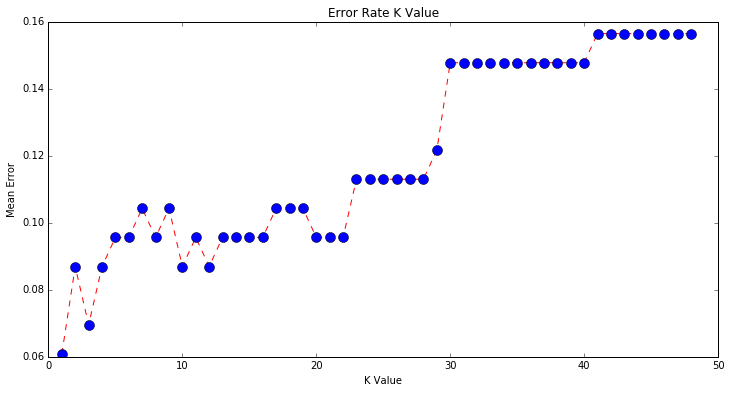

In [40]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1,49), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_dtm_train,y_train)
y_pred_class_knn = knn.predict(X_dtm_test)

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,class_weight={0:.7,1:.3}, min_samples_leaf=15)
classifier.fit(X_dtm_train,y_train)
y_pred_tree = classifier.predict(X_dtm_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rand_classifer = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rand_classifer.fit(X_dtm_train,y_train)
y_pred_randforest = rand_classifer.predict(X_dtm_test)

In [49]:
print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm,average=None))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm,average=None))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm,average=None))
#print("===> **SVM ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_svm,average=None))
print("##################################################################################################")
print("LogisticReg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_logreg))
print('LogisticReg CLASSIFIER CONFUSTION MATRIX:',metrics.confusion_matrix(y_test,y_pred_class_logreg))
print("===> **LogisticReg F1 SCORE",metrics.f1_score(y_test, y_pred_class_logreg,average=None))
print("===> **LogisticReg Recall SCORE",metrics.recall_score(y_test, y_pred_class_logreg,average=None))
print("===> **LogisticReg Precision SCORE",metrics.precision_score(y_test, y_pred_class_logreg,average=None))
#print("===> **LogisticReg ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_logreg,average=None))
print("##################################################################################################")
print("NaiveBayes ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_nb))
print('NaiveBayes CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_nb))
print("===> **NaiveBayes F1 SCORE",metrics.f1_score(y_test, y_pred_class_nb,average=None))
print("===> **NaiveBayes Recall SCORE",metrics.recall_score(y_test, y_pred_class_nb,average=None))
print("===> **NaiveBayes Precision SCORE",metrics.precision_score(y_test, y_pred_class_nb,average=None))
#print("===> **NaiveBayes ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_nb,average=None))
print("##################################################################################################")
print("KNN ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_knn))
print('KNN CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_knn))
print("===> **KNN F1 SCORE",metrics.f1_score(y_test, y_pred_class_knn,average=None))
print("===> **KNN Recall SCORE",metrics.recall_score(y_test, y_pred_class_knn,average=None))
print("===> **KNN Precision SCORE",metrics.precision_score(y_test, y_pred_class_knn,average=None))
#print("===> **KNN ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_knn,average=None))
print("##################################################################################################")
print("Dtree ACCURACY:",metrics.accuracy_score(y_test,y_pred_tree))
print('Dtree CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_tree))
print("===> **Dtree F1 SCORE",metrics.f1_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Recall SCORE",metrics.recall_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Precision SCORE",metrics.precision_score(y_test, y_pred_tree,average=None))
#print("===> **Dtree ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_tree,average=None))
print("##################################################################################################")
print("RandForest ACCURACY:",metrics.accuracy_score(y_test,y_pred_randforest))
print('RandForest CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_randforest))
print("===> **RandForest F1 SCORE",metrics.f1_score(y_test, y_pred_randforest,average=None))
print("===> **RandForest Recall SCORE",metrics.recall_score(y_test, y_pred_randforest,average=None))
print("===> **RandForest Precision SCORE",metrics.precision_score(y_test, y_pred_randforest,average=None))
#print("===> **RandForest ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_randforest,average=None))

SVM ACCURACY: 0.9391304347826087
SVM CLASSIFIER CONFUSTION MATRIX: col_0      0  2   3
Labelenc           
0         32  0   3
1          0  0   3
2          0  5   0
3          1  0  71
===> **SVM F1 SCORE [0.94117647 0.         1.         0.95302013]
===> **SVM Recall SCORE [0.91428571 0.         1.         0.98611111]
===> **SVM Precision SCORE [0.96969697 0.         1.         0.92207792]
##################################################################################################
LogisticReg ACCURACY: 0.9391304347826087
LogisticReg CLASSIFIER CONFUSTION MATRIX: [[32  0  0  3]
 [ 0  1  0  2]
 [ 0  0  5  0]
 [ 2  0  0 70]]
===> **LogisticReg F1 SCORE [0.92753623 0.5        1.         0.95238095]
===> **LogisticReg Recall SCORE [0.91428571 0.33333333 1.         0.97222222]
===> **LogisticReg Precision SCORE [0.94117647 1.         1.         0.93333333]
##################################################################################################
NaiveBayes ACCURACY: 0.860869

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.3, max_depth=10)
gbcl = gbcl.fit(X_dtm_train, y_train)

In [46]:
y_pred_gbcl = gbcl.predict(X_dtm_test)

In [47]:
print("GBC: ACCURACY:",metrics.accuracy_score(y_test,y_pred_gbcl))
print('GBC CLASSIFIER CONFUSTION MATRIX:%\n',pd.crosstab(y_test,y_pred_gbcl))
print("===> **GBC F1 SCORE",metrics.f1_score(y_test, y_pred_gbcl,average=None))
print("===> **GBC Recall SCORE",metrics.recall_score(y_test, y_pred_gbcl,average=None))
print("===> **GBC Precision SCORE",metrics.precision_score(y_test, y_pred_gbcl,average=None))
#print("===> **GBC ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_gbcl,average=None))

GBC: ACCURACY: 0.9304347826086956
GBC CLASSIFIER CONFUSTION MATRIX:%
 col_0      0  1  2   3
Labelenc              
0         31  0  0   4
1          0  1  0   2
2          1  0  4   0
3          1  0  0  71
===> **GBC F1 SCORE [0.91176471 0.5        0.88888889 0.95302013]
===> **GBC Recall SCORE [0.88571429 0.33333333 0.8        0.98611111]
===> **GBC Precision SCORE [0.93939394 1.         1.         0.92207792]


In [48]:
import pickle


In [50]:
randclass = 'rand_classifer.sav'

In [51]:
pickle.dump(rand_classifer,open(randclass,'wb'))

In [53]:
vectorizer_jtvp = 'tfidf_vec.pk'

In [54]:
pickle.dump(tfidf_vec,open(vectorizer_jtvp,'wb'))

In [55]:
#Randomfor = 'RandomForest_complainttext.sav'

In [56]:
#pickle.dump(rand_classifer,open(Randomfor,'wb'))